In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_new_minstable_r4_x0.1_f10_d200.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")

print(menor.shape,list_of_x0.shape)


(2633, 4) (50000,)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []
future_error2d = []
future_error3d = []
future_error4d = []



for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 200
    future = 40
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
    if error<0.1 and error>=0.01:
        future_error2d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.01 and error>=0.001:
        future_error3d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.001:
        future_error4d.append(prediction.flatten()-data[trainlen:trainlen+future])

    
    
    

0 test error: 0.406391814023079
1 test error: 0.264815046883732
2 test error: 0.4442241165129828
3 test error: 0.38207918064263846
4 test error: 4.465682980345041
5 test error: 0.35747602618106644
6 test error: 0.43897239106805763
7 test error: 0.4402839416081136
8 test error: 15.39654371263938
9 test error: 1.0963713545370497
10 test error: 0.3817714454211396
11 test error: 0.33940018648628745
12 test error: 2.656541552699426
13 test error: 26.630408701905203
14 test error: 0.4589662563982021
15 test error: 0.39599277005498695
16 test error: 3.0782346562965643
17 test error: 13.473906113107477
18 test error: 9.291640574203912
19 test error: 0.30302181694625036
20 test error: 0.3508171724010108
21 test error: 7.481555844314857
22 test error: 0.44241822385529433
23 test error: 0.4320834455036574
24 test error: 0.45529024985077654
25 test error: 0.3917045735921479
26 test error: 0.35092509361748786
27 test error: 0.8991731764122173
28 test error: 0.3355425970882765
29 test error: 0.41736

237 test error: 7.690707146085413
238 test error: 0.41500458195175854
239 test error: 0.3769257562272307
240 test error: 0.3961602457544421
241 test error: 0.3508030651107942
242 test error: 6.122776063123541
243 test error: 0.42306977349487385
244 test error: 0.3875012397944964
245 test error: 2.6077825252081954
246 test error: 3.84550896975762
247 test error: 0.3859423378595286
248 test error: 0.3625188077499944
249 test error: 7.906278755100098
250 test error: 0.37428528222778484
251 test error: 0.344379893577421
252 test error: 0.33432379040278254
253 test error: 0.35357480140303943
254 test error: 0.38709533612574154
255 test error: 0.44598915789875954
256 test error: 7.813805141747816
257 test error: 0.4086004946704901
258 test error: 0.4412600186207085
259 test error: 0.3883553299225825
260 test error: 0.3401366537861982
261 test error: 12.353309661786836
262 test error: 7.939268955149681
263 test error: 8.295539287387767
264 test error: 0.35467525839296576
265 test error: 0.416

471 test error: 9.494600353986801
472 test error: 5.711776845801501
473 test error: 5.549357846861698
474 test error: 0.38609131878193026
475 test error: 26.749490730122098
476 test error: 0.32086933155374975
477 test error: 0.2551457340885832
478 test error: 0.41591267550428224
479 test error: 0.40382942201116034
480 test error: 2.3079689599229227
481 test error: 0.40052103024274516
482 test error: 0.3609046996427665
483 test error: 0.3468788985980602
484 test error: 0.3867120695399062
485 test error: 0.3485238779108248
486 test error: 0.4059769737407078
487 test error: 6.46969733383139
488 test error: 5.579570805070381
489 test error: 0.2801893360302665
490 test error: 0.30369929606722623
491 test error: 0.3852798016444691
492 test error: 0.3945973866587075
493 test error: 9.764812485699643
494 test error: 6.7546281455915755
495 test error: 0.32969383539664926
496 test error: 0.3605242394325513
497 test error: 8.325777220147149
498 test error: 0.3618720479957217
499 test error: 7.672

708 test error: 0.38970924835520065
709 test error: 0.3640946826635313
710 test error: 0.3986849026855538
711 test error: 0.36286075398903217
712 test error: 1.075598087666443
713 test error: 0.40684237075188084
714 test error: 0.4088962912191672
715 test error: 0.395810560010909
716 test error: 9.764156067263322
717 test error: 0.3975897739345406
718 test error: 0.39726780895438396
719 test error: 0.4416876830539105
720 test error: 8.930510539850962
721 test error: 0.3848580668087408
722 test error: 1.3816651353074518
723 test error: 1.266717269400515
724 test error: 10.156477614129715
725 test error: 4.902075902685014
726 test error: 0.42645483541950285
727 test error: 0.3750904333179199
728 test error: 0.42663707233746445
729 test error: 0.3139820185123046
730 test error: 0.44996715643186697
731 test error: 0.36330826731482646
732 test error: 0.429860942300318
733 test error: 0.3898274269122737
734 test error: 0.4285498434533035
735 test error: 9.356715937762868
736 test error: 2.70

942 test error: 0.37631684864395604
943 test error: 8.721837751439145
944 test error: 5.965388905772393
945 test error: 0.4401795474663495
946 test error: 5.672507440930516
947 test error: 0.39000475221117664
948 test error: 0.4072263392043625
949 test error: 0.3424795049350025
950 test error: 0.40934829699847525
951 test error: 0.285055020762003
952 test error: 0.3819092796698345
953 test error: 0.4271542648438601
954 test error: 3.5012565683147843
955 test error: 3.908070980937954
956 test error: 0.3207053898234885
957 test error: 4.824573767719406
958 test error: 0.3987668077092458
959 test error: 0.3290743865141508
960 test error: 0.36497771059443473
961 test error: 0.44673649349353833
962 test error: 10.17588351274966
963 test error: 7.771141552813725
964 test error: 0.3303086618868419
965 test error: 0.40347017490183684
966 test error: 0.3403460786787533
967 test error: 4.074855790172758
968 test error: 0.29278719734296316
969 test error: 0.35397923243072027
970 test error: 0.404

1171 test error: 0.41400648614313995
1172 test error: 0.3692232744026758
1173 test error: 0.47135810140177925
1174 test error: 3.3570437667604636
1175 test error: 0.3619093315908536
1176 test error: 0.34528548646348645
1177 test error: 0.39853345248660854
1178 test error: 0.39722496160580534
1179 test error: 9.854571259064166
1180 test error: 0.3927491538764922
1181 test error: 3.8094237181117636
1182 test error: 4.027112804957565
1183 test error: 0.37470222507098994
1184 test error: 0.36045816516612383
1185 test error: 0.4286834803763313
1186 test error: 3.270461615734811
1187 test error: 0.4511610966994938
1188 test error: 1.2347284496944317
1189 test error: 10.621041651327191
1190 test error: 6.471329648569781
1191 test error: 0.552344044284973
1192 test error: 0.34897192851020525
1193 test error: 3.1754206795440294
1194 test error: 0.45122924111378016
1195 test error: 0.3471085690113413
1196 test error: 7.365430979039823
1197 test error: 0.36776872021734874
1198 test error: 0.36625

1400 test error: 0.4032319408902477
1401 test error: 0.35925443526404216
1402 test error: 0.3752904520412248
1403 test error: 0.3748290314291396
1404 test error: 0.39292219523008565
1405 test error: 0.45225028063312533
1406 test error: 0.4037902731613727
1407 test error: 3.0083227448005108
1408 test error: 11.060084222623534
1409 test error: 2.2186997155615886
1410 test error: 9.184973688523682
1411 test error: 0.3989558775456935
1412 test error: 0.2990638253900227
1413 test error: 0.38187088415717885
1414 test error: 0.4325949761960215
1415 test error: 0.36580264315450145
1416 test error: 6.3662379930992445
1417 test error: 0.3785868846650051
1418 test error: 0.39706808197019905
1419 test error: 11.921316872279185
1420 test error: 14.484160808819414
1421 test error: 3.2329952050141877
1422 test error: 0.42905129219392546
1423 test error: 0.3225660100996579
1424 test error: 0.4899471275616772
1425 test error: 0.3124413300845648
1426 test error: 3.653554847579662
1427 test error: 1.2273

1628 test error: 0.3624566811538031
1629 test error: 0.4435624727470444
1630 test error: 0.4235019733511438
1631 test error: 0.4475288289159027
1632 test error: 4.482534824853477
1633 test error: 0.4233649932137338
1634 test error: 0.37633856046527636
1635 test error: 0.46813322801574603
1636 test error: 0.3111835606781295
1637 test error: 0.3729762716152664
1638 test error: 0.41438263365406036
1639 test error: 14.739267518148193
1640 test error: 0.42564955048532505
1641 test error: 5.472651237649714
1642 test error: 0.4110461830658698
1643 test error: 2.2507634628520385
1644 test error: 0.4177320234400777
1645 test error: 11.588070270280815
1646 test error: 1.6297829564074655
1647 test error: 0.4348878885735889
1648 test error: 0.3122972297328369
1649 test error: 0.4399647720098735
1650 test error: 1.919087454285967
1651 test error: 1.0348265961808756
1652 test error: 0.31650183519580877
1653 test error: 8.402504965052215
1654 test error: 7.954121635873535
1655 test error: 0.360047319

1857 test error: 3.659293975401061
1858 test error: 0.3424803472878064
1859 test error: 11.14129006704945
1860 test error: 0.4014843262885972
1861 test error: 0.3932247654013844
1862 test error: 14.465290335375261
1863 test error: 0.4046580506845016
1864 test error: 0.34540932951762177
1865 test error: 10.95955211749457
1866 test error: 0.328020562318345
1867 test error: 0.3379692650982079
1868 test error: 0.38066712004522013
1869 test error: 10.05530444813482
1870 test error: 7.144675129174575
1871 test error: 3.4365189419882345
1872 test error: 0.4481408827398706
1873 test error: 0.3789541864897686
1874 test error: 3.2145978331979848
1875 test error: 4.924480209518962
1876 test error: 6.288297069367066
1877 test error: 2.700526210882783
1878 test error: 5.525402897124023
1879 test error: 7.873536851042593
1880 test error: 4.2119030421244865
1881 test error: 0.30134924780005573
1882 test error: 4.832491438729472
1883 test error: 0.39391035671108254
1884 test error: 0.35420934625080924

2087 test error: 1.7495041326842762
2088 test error: 1.5861317825025876
2089 test error: 0.38662129894662356
2090 test error: 6.154903219254859
2091 test error: 7.804338205455591
2092 test error: 0.932721038985322
2093 test error: 14.917365929861534
2094 test error: 0.3905698284069258
2095 test error: 0.33459651594390966
2096 test error: 0.4186871856509598
2097 test error: 3.2329787224168176
2098 test error: 2.705142927413467
2099 test error: 0.41596189888339036
2100 test error: 0.4337937091690759
2101 test error: 0.4173504887706293
2102 test error: 0.37956066105577846
2103 test error: 3.4038723278451566
2104 test error: 0.3506491100883799
2105 test error: 0.42763557337050223
2106 test error: 1.1258720152506045
2107 test error: 1.8335773443882317
2108 test error: 11.217094206301718
2109 test error: 0.44894471479369125
2110 test error: 0.36635330892316176
2111 test error: 3.4884799524636434
2112 test error: 7.654559852747824
2113 test error: 0.45030071288141493
2114 test error: 0.357623

2318 test error: 0.3940218587535237
2319 test error: 0.3420866707319513
2320 test error: 1.5238212921383705
2321 test error: 7.556907219032493
2322 test error: 0.3683513957310191
2323 test error: 3.9994673829702285
2324 test error: 0.40680632873039163
2325 test error: 1.8521769793610898
2326 test error: 0.3811552141469093
2327 test error: 0.4043161844663131
2328 test error: 7.741761411602969
2329 test error: 9.55502398470008
2330 test error: 2.941023392892554
2331 test error: 0.4475985477717067
2332 test error: 0.36644328272308435
2333 test error: 0.41445163185643763
2334 test error: 11.431558309092358
2335 test error: 4.969050017802778
2336 test error: 0.3891738558962286
2337 test error: 8.043918118144237
2338 test error: 8.723253811671466
2339 test error: 0.4805589025711311
2340 test error: 0.3394622336414143
2341 test error: 0.36856883465768336
2342 test error: 7.738064083548301
2343 test error: 5.017969236545391
2344 test error: 0.41006872627825547
2345 test error: 3.34022160940781

2546 test error: 0.3503592032870218
2547 test error: 0.4008310000911154
2548 test error: 3.513234479761947
2549 test error: 8.713218929333573
2550 test error: 7.188588329102386
2551 test error: 4.586057808133263
2552 test error: 0.41508473381373784
2553 test error: 1.4025860018973315
2554 test error: 3.276518668782649
2555 test error: 0.3771535418741179
2556 test error: 9.461661179645013
2557 test error: 0.40426339192644467
2558 test error: 0.3828051117579634
2559 test error: 1.6446746906674745
2560 test error: 0.3557943980776361
2561 test error: 0.3566635414001024
2562 test error: 0.2977612811133084
2563 test error: 0.4207156324889609
2564 test error: 0.40750005397630534
2565 test error: 0.4274057210687096
2566 test error: 0.8315925598294951
2567 test error: 3.3561732443410506
2568 test error: 9.57715347444774
2569 test error: 0.43531749578859347
2570 test error: 9.105801567406138
2571 test error: 11.11607388276406
2572 test error: 0.34559692287905486
2573 test error: 0.39816790679014

In [4]:
FUTUREerror = turnintoarray(future_error,future)
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')


mae [0.00113314751375005, 0.0014029804857483453, 0.0015697904866107187, 0.0016012474756567784, 0.0016378018539475654, 0.0018429450590218294, 0.002157185582087342, 0.003662675400847388, 0.005343439532265896, 0.008444320076097595, 0.01845922216475055, 0.04309106831125821, 0.08016464054151141, 0.17043841149090086, 0.28856346018573126, 0.5227015187188536, 0.672313571486978, 0.8617590265998037, 1.0471000589741024, 1.1690144587151297, 1.3723996606911268, 1.5100807505830587, 1.6510424836046662, 1.8162808185250987, 1.9602185591040873, 2.067947827012231, 2.237001922563747, 2.3558669356095754, 2.5090440790324884, 2.602334361773413, 2.7456519423906722, 2.896374144523214, 3.0455956469980685, 3.1275590036472702, 3.2686646948349596, 3.332486652746285, 3.4339522772576467, 3.5931902140703653, 3.6754163750573055, 3.783345212689671] 
 mse [3.7504113291318975e-06, 6.708261685238724e-06, 9.343398828729694e-06, 1.0040493513206328e-05, 1.1871211608160858e-05, 2.9873687030887435e-05, 0.00013527801531403104, 

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


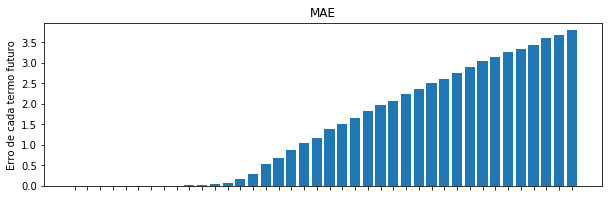

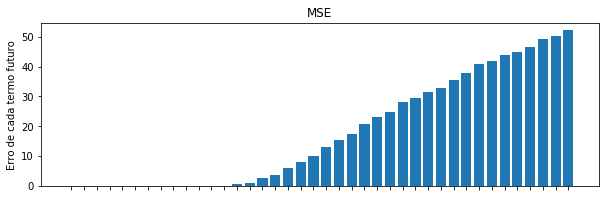

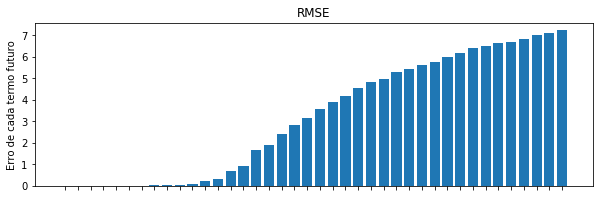

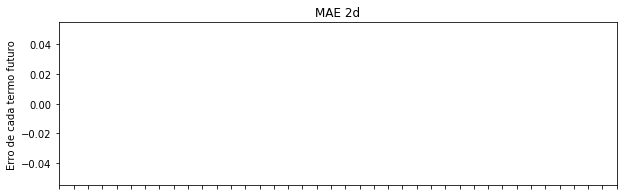

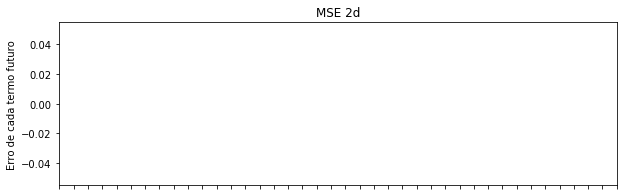

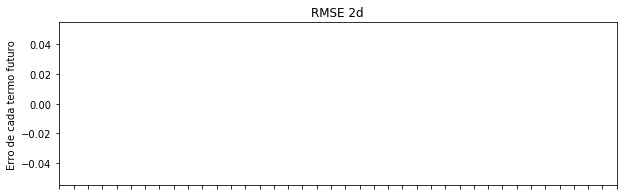

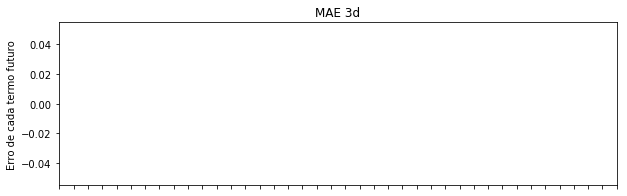

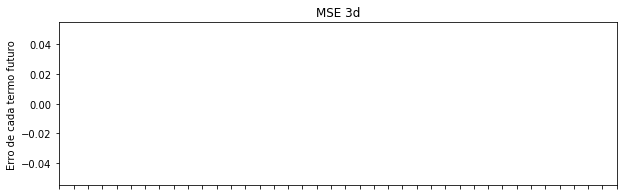

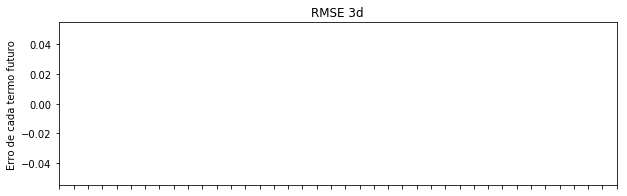

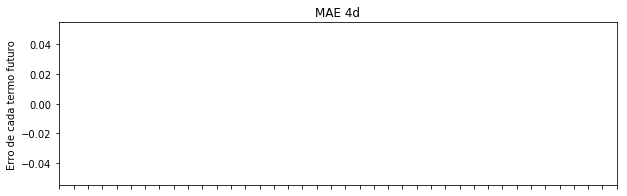

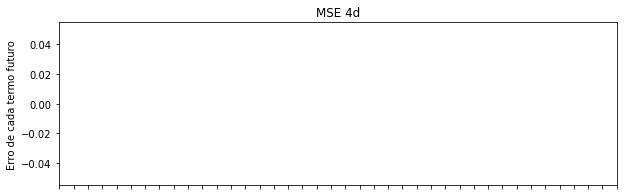

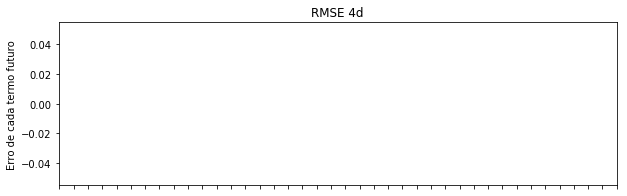

In [5]:

label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

2633


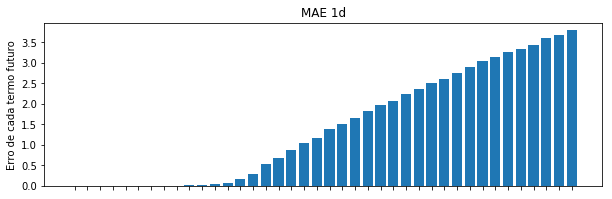

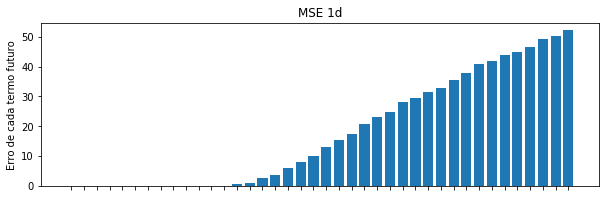

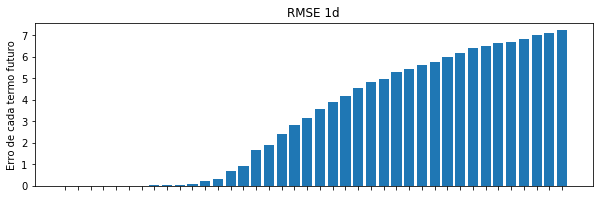

In [6]:
future_error1d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    if np.sqrt(np.sum(b)/20)>0.1:
        future_error1d.append(FUTUREerror[i])
    elif np.sqrt(np.sum(b)/20)<0.001:
        print(i,np.sqrt(np.sum(b)/20))

print(len(future_error1d))
FUTUREerror1d = turnintoarray(future_error1d,future)
mae1d,mse1d,rmse1d = geterrors(FUTUREerror1d)

plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae1d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse1d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse1d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

In [7]:
print(mae,mse,rmse)

[0.00113314751375005, 0.0014029804857483453, 0.0015697904866107187, 0.0016012474756567784, 0.0016378018539475654, 0.0018429450590218294, 0.002157185582087342, 0.003662675400847388, 0.005343439532265896, 0.008444320076097595, 0.01845922216475055, 0.04309106831125821, 0.08016464054151141, 0.17043841149090086, 0.28856346018573126, 0.5227015187188536, 0.672313571486978, 0.8617590265998037, 1.0471000589741024, 1.1690144587151297, 1.3723996606911268, 1.5100807505830587, 1.6510424836046662, 1.8162808185250987, 1.9602185591040873, 2.067947827012231, 2.237001922563747, 2.3558669356095754, 2.5090440790324884, 2.602334361773413, 2.7456519423906722, 2.896374144523214, 3.0455956469980685, 3.1275590036472702, 3.2686646948349596, 3.332486652746285, 3.4339522772576467, 3.5931902140703653, 3.6754163750573055, 3.783345212689671] [3.7504113291318975e-06, 6.708261685238724e-06, 9.343398828729694e-06, 1.0040493513206328e-05, 1.1871211608160858e-05, 2.9873687030887435e-05, 0.00013527801531403104, 0.00081468